In [1]:
# import head
from nbodykit.lab import *
from nbodykit import style, setup_logging
import matplotlib.pyplot as plt
plt.style.use(style.notebook)
import gc
# import numpy as np
# import nbodykit as nb

In [2]:
import momentum as m

In [3]:
#强制重载
import importlib
importlib.reload(m)

<module 'momentum' from '/Raid6/1/TeamYZ/xiting/momentum/momentum.py'>

./momentum_cache/r01_cache_12_bin_noweight.joblib
./momentum_cache/P01_cache_12_bin_noweight.joblib
./momentum_cache/P01_cache_12_bin_0_6.joblib
./momentum_cache/P01_cache_12_bin_0_6.joblib
./momentum_cache/P01_cache_12_bin_0_8.joblib
./momentum_cache/P01_cache_12_bin_0_8.joblib
./momentum_cache/P01_cache_12_bin_1.joblib
./momentum_cache/P01_cache_12_bin_1.joblib
./momentum_cache/P01_cache_12_bin_1_2.joblib
./momentum_cache/P01_cache_12_bin_1_2.joblib
./momentum_cache/P01_cache_12_bin_1_4.joblib
./momentum_cache/P01_cache_12_bin_1_4.joblib


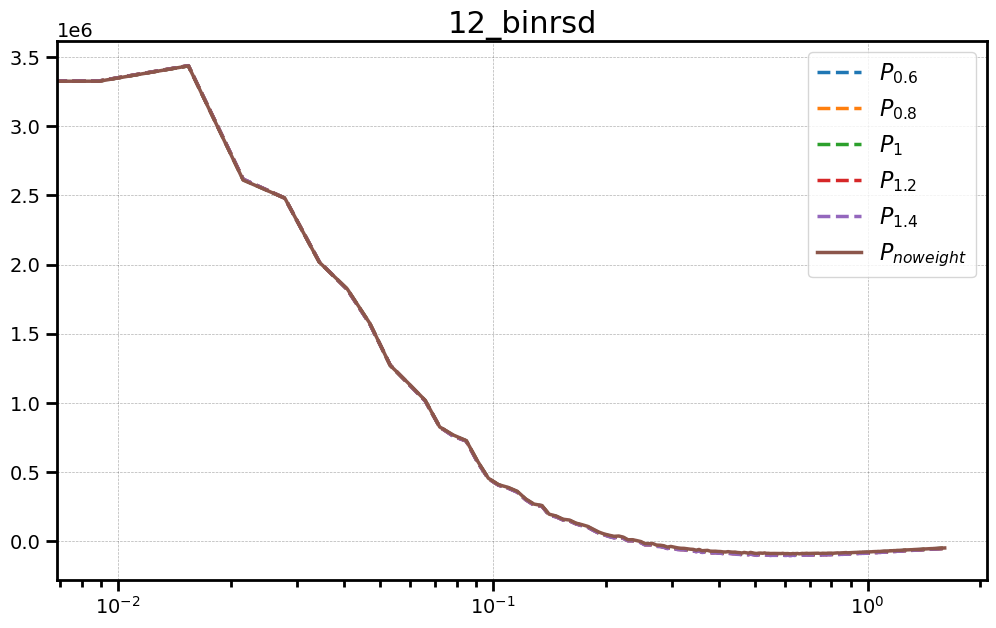

./momentum_cache/r01_cache_12_5_bin_noweight.joblib
./momentum_cache/P01_cache_12_5_bin_noweight.joblib
./momentum_cache/P01_cache_12_5_bin_0_6.joblib
./momentum_cache/P01_cache_12_5_bin_0_6.joblib
./momentum_cache/P01_cache_12_5_bin_0_8.joblib
./momentum_cache/P01_cache_12_5_bin_0_8.joblib
./momentum_cache/P01_cache_12_5_bin_1.joblib
./momentum_cache/P01_cache_12_5_bin_1.joblib
./momentum_cache/P01_cache_12_5_bin_1_2.joblib
./momentum_cache/P01_cache_12_5_bin_1_2.joblib
./momentum_cache/P01_cache_12_5_bin_1_4.joblib
./momentum_cache/P01_cache_12_5_bin_1_4.joblib


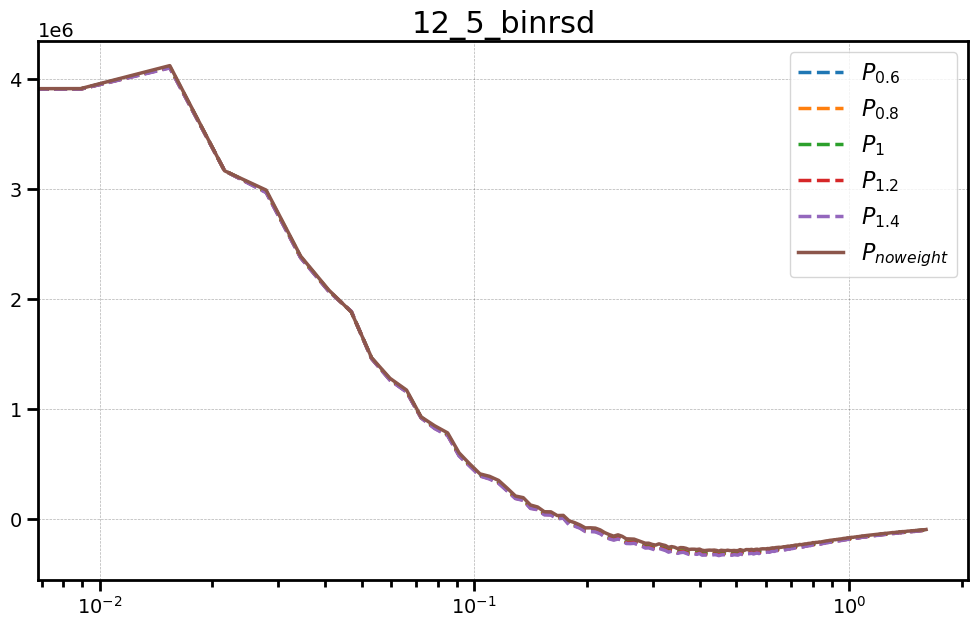

./momentum_cache/r01_cache_13_bin_noweight.joblib
./momentum_cache/P01_cache_13_bin_noweight.joblib
./momentum_cache/P01_cache_13_bin_0_6.joblib
./momentum_cache/P01_cache_13_bin_0_6.joblib
./momentum_cache/P01_cache_13_bin_0_8.joblib
./momentum_cache/P01_cache_13_bin_0_8.joblib
./momentum_cache/P01_cache_13_bin_1.joblib
./momentum_cache/P01_cache_13_bin_1.joblib
./momentum_cache/P01_cache_13_bin_1_2.joblib
./momentum_cache/P01_cache_13_bin_1_2.joblib
./momentum_cache/P01_cache_13_bin_1_4.joblib
./momentum_cache/P01_cache_13_bin_1_4.joblib


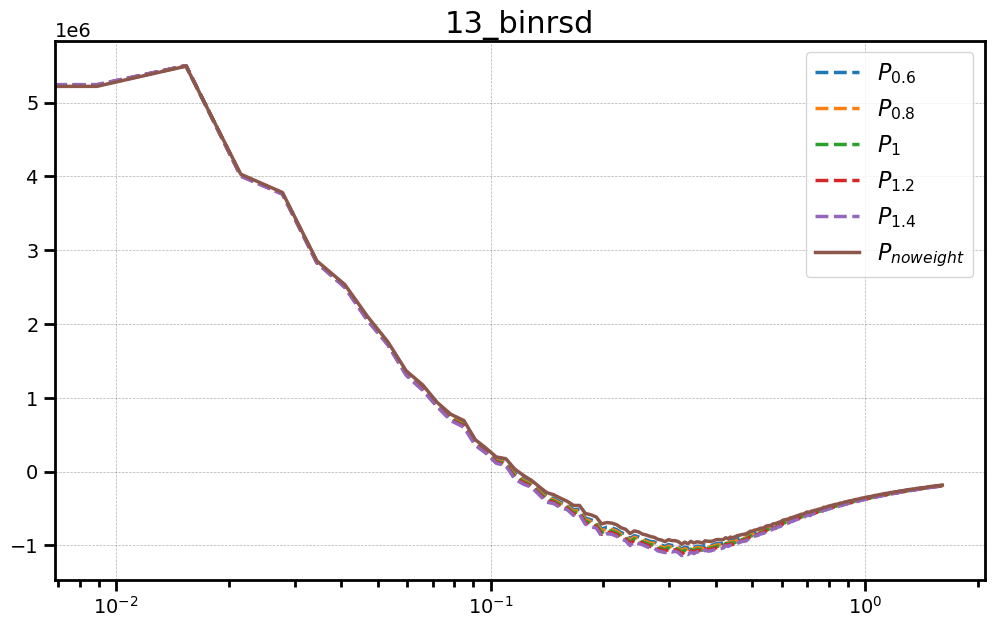

./momentum_cache/r01_cache_13_5_bin_noweight.joblib
./momentum_cache/P01_cache_13_5_bin_noweight.joblib
./momentum_cache/P01_cache_13_5_bin_0_6.joblib
./momentum_cache/P01_cache_13_5_bin_0_6.joblib
./momentum_cache/P01_cache_13_5_bin_0_8.joblib
./momentum_cache/P01_cache_13_5_bin_0_8.joblib
./momentum_cache/P01_cache_13_5_bin_1.joblib
./momentum_cache/P01_cache_13_5_bin_1.joblib
./momentum_cache/P01_cache_13_5_bin_1_2.joblib
./momentum_cache/P01_cache_13_5_bin_1_2.joblib
./momentum_cache/P01_cache_13_5_bin_1_4.joblib
./momentum_cache/P01_cache_13_5_bin_1_4.joblib


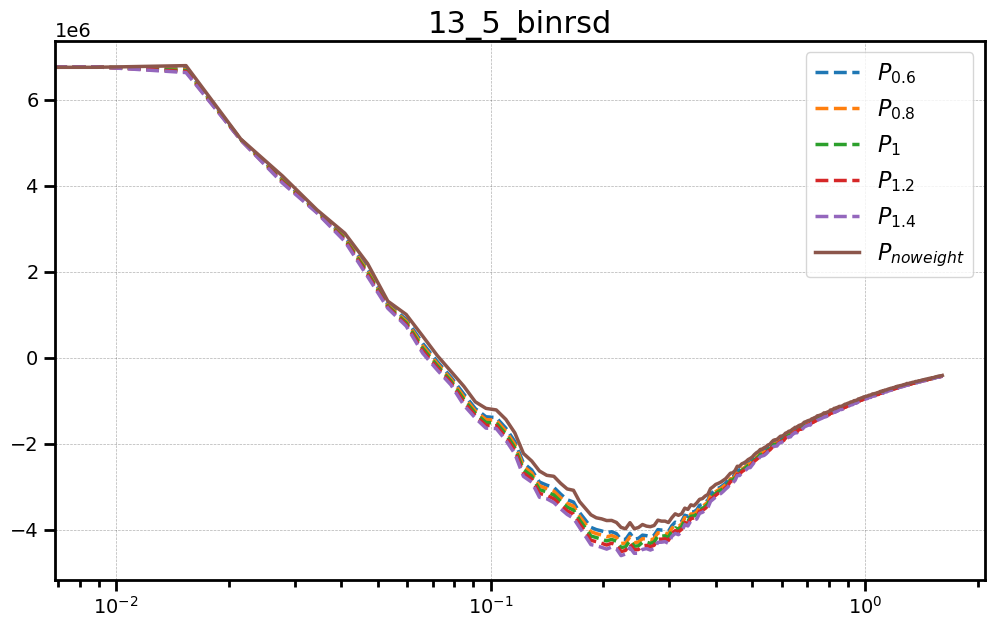

In [4]:
#循环
for num in ['12_bin', '12_5_bin', '13_bin', '13_5_bin']:
    plt.figure()
    #无weight部分
    #读数据
    cat_nw = m.data_read(num)
    #加红移
    cat_nw = m.RED(cat_nw)
    #计算矩阵
    r01_nw, P01_nw = m.momentum_01(cat_nw, num)
    #gamma部分
    #读取数据
    cat = m.data_read(num)
    #加红移
    cat = m.RED(cat)
    for gamma in [0.6, 0.8, 1, 1.2, 1.4]:
        label = r'$P_{%s}$' % (str(gamma))
        #按gamma加权
        cat_gamma = m.weight_gamma(cat=cat,gamma=gamma)
        #计算矩阵
        r01, P01 = m.momentum_01(cat=cat_gamma, num=num, gamma=gamma)
        plt.loglog(r01.power['k'], P01, label=label, linestyle='--')
    del cat
    gc.collect() 
    plt.loglog(r01_nw.power['k'], P01_nw, label=r"$P_{noweight}$")
    plt.yscale('linear')
    plt.legend()
    plt.title(str(num) + 'rsd')
    plt.show()

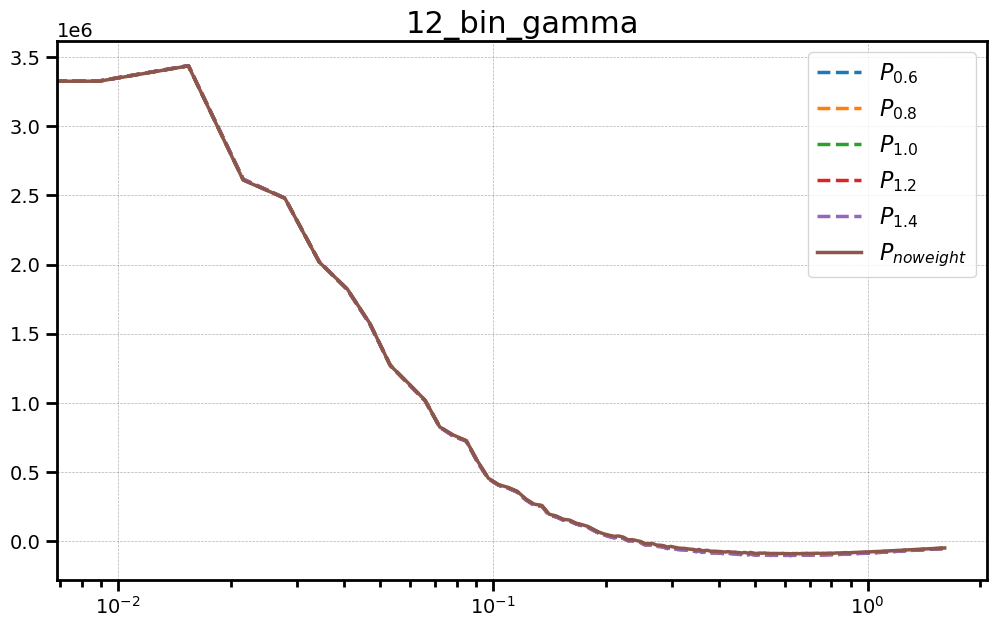

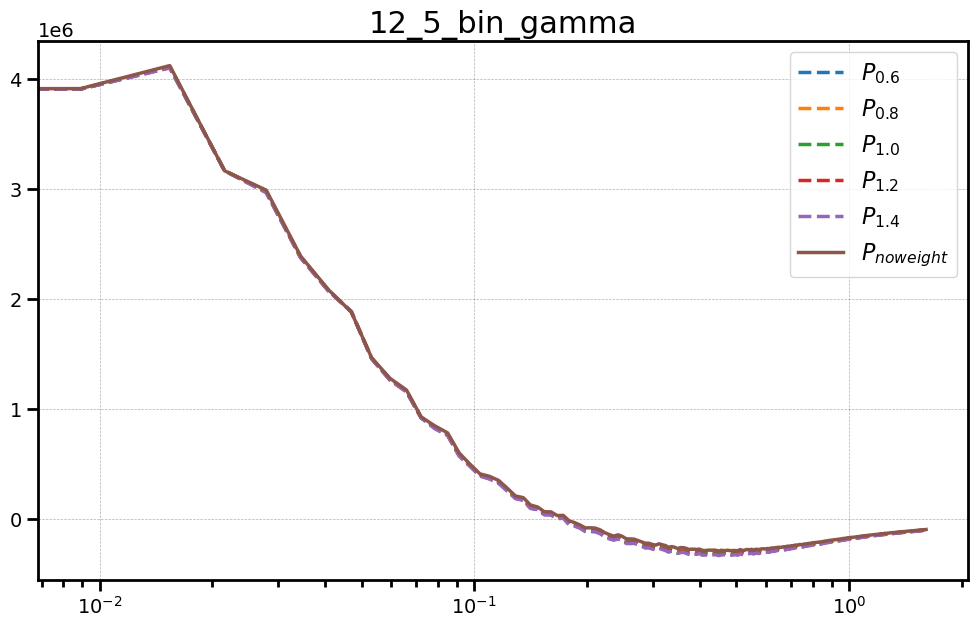

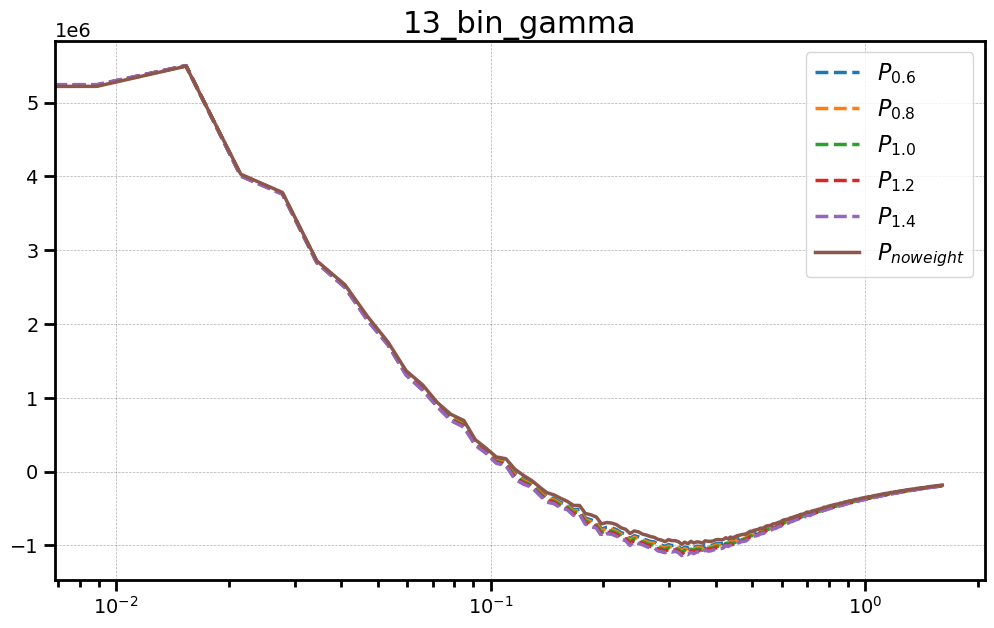

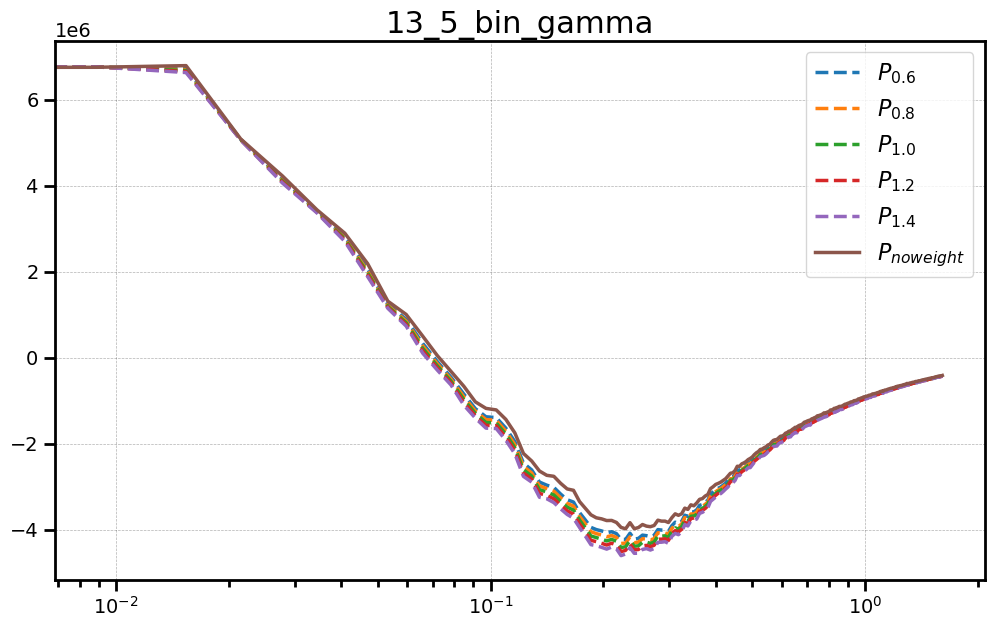

In [5]:
for num in ['12_bin', '12_5_bin', '13_bin', '13_5_bin']:
    plt.figure()
    r01_nw_test, P01_nw_test = m.cache_read(num)
    for gamma in [0.6, 0.8, 1, 1.2, 1.4]:
        r01_test, P01_test = m.cache_read(num, gamma=gamma)
        label = '$P_{%.1f}$'%(gamma)
        plt.loglog(r01_test.power['k'], P01_test, label=label, linestyle='--')
    plt.loglog(r01_nw_test.power['k'], P01_nw_test, label=r"$P_{noweight}$")
    plt.yscale('linear')
    plt.title(str(num) + '_gamma')
    plt.legend()
    plt.show()

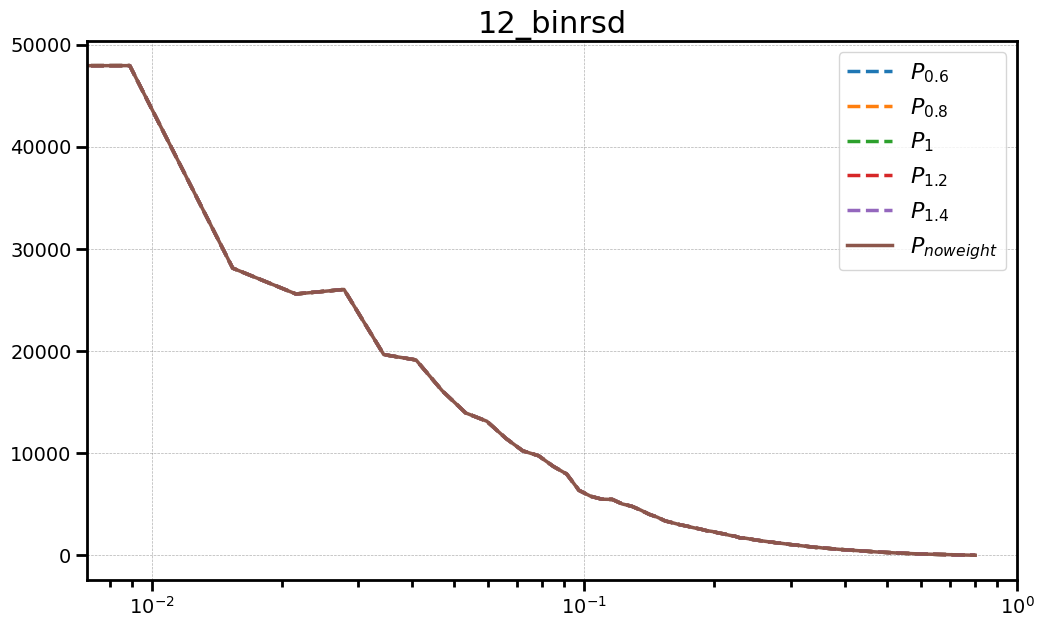

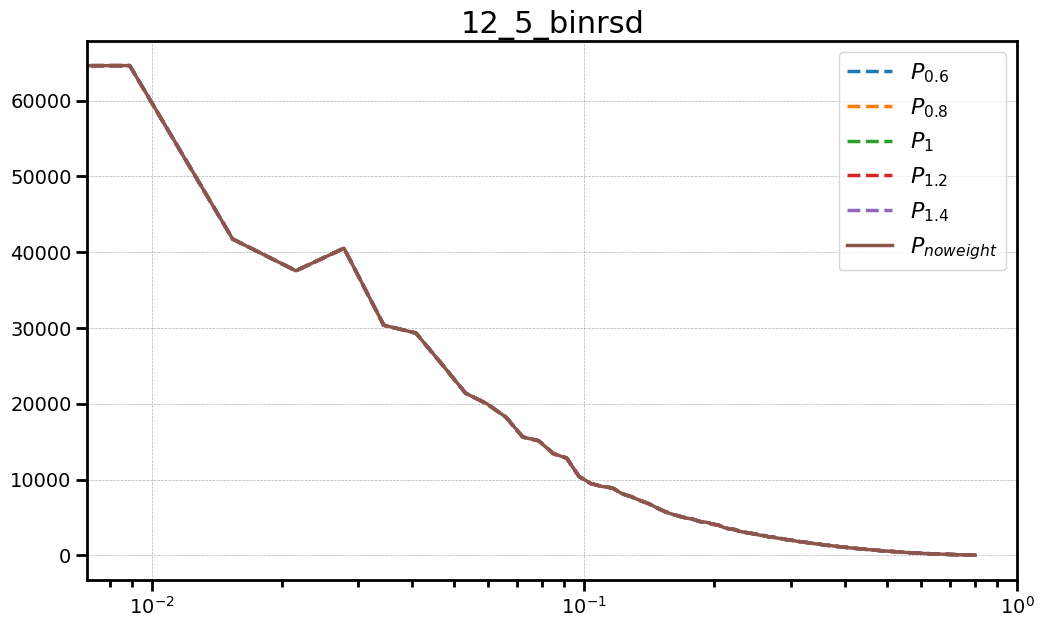

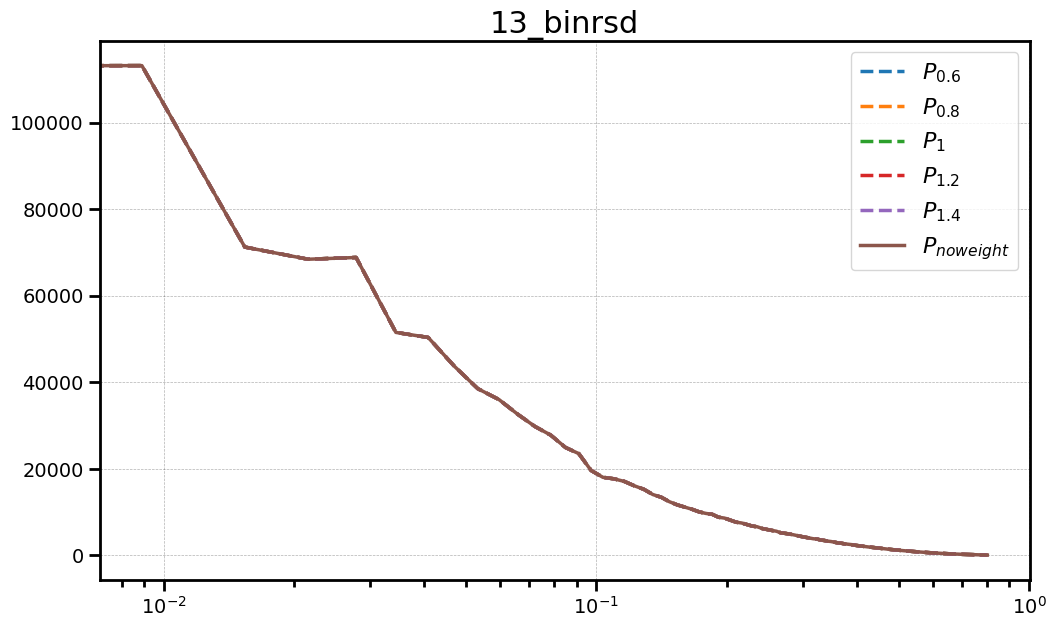

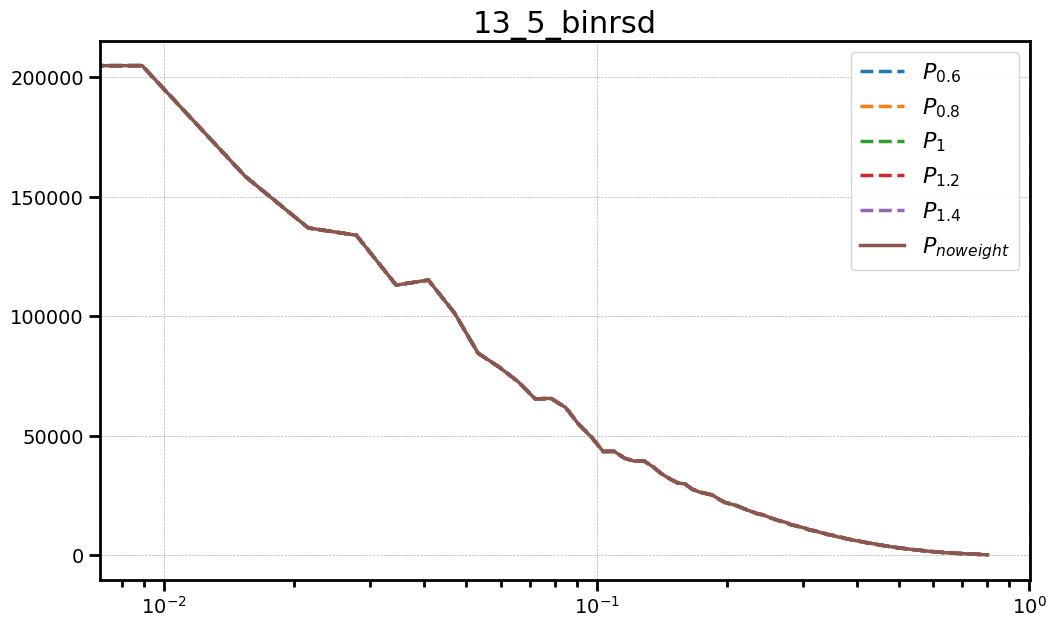

In [6]:
#循环
for num in ['12_bin', '12_5_bin', '13_bin', '13_5_bin']:
    plt.figure()
    #无weight部分
    #读数据
    cat_nw = m.data_read(num)
    #加红移
    cat_nw = m.RED(cat_nw)
    #计算矩阵
    r01_nw, P01_nw = m.momentum_00(cat_nw, num)
    #gamma部分
    #读取数据
    cat = m.data_read(num)
    #加红移
    cat = m.RED(cat)
    for gamma in [0.6, 0.8, 1, 1.2, 1.4]:
        label = r'$P_{%s}$' % (str(gamma))
        #按gamma加权
        cat_gamma = m.weight_gamma(cat=cat,gamma=gamma)
        #计算矩阵
        r01, P01 = m.momentum_00(cat=cat_gamma, num=num, gamma=gamma)
        plt.loglog(r01.power['k'], P01, label=label, linestyle='--')
    del cat
    gc.collect() 
    plt.loglog(r01_nw.power['k'], P01_nw, label=r"$P_{noweight}$")
    plt.yscale('linear')
    plt.legend()
    plt.title(str(num) + 'rsd')
    plt.show()

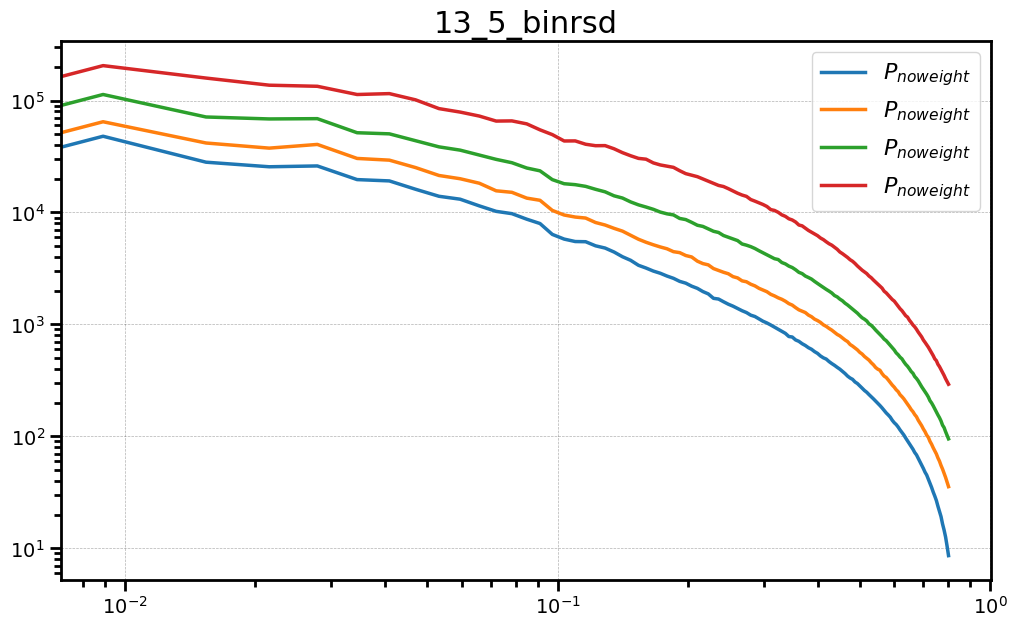

In [8]:
#循环
for num in ['12_bin', '12_5_bin', '13_bin', '13_5_bin']:
    # plt.figure()
    #无weight部分
    #读数据
    cat_nw = m.data_read(num)
    #加红移
    cat_nw = m.RED(cat_nw)
    #计算矩阵
    r01_nw, P01_nw = m.momentum_00(cat_nw, num)
    # #gamma部分
    # #读取数据
    # cat = m.data_read(num)
    # #加红移
    # cat = m.RED(cat)
    # for gamma in [0.6, 0.8, 1, 1.2, 1.4]:
    #     label = r'$P_{%s}$' % (str(gamma))
    #     #按gamma加权
    #     cat_gamma = m.weight_gamma(cat=cat,gamma=gamma)
    #     #计算矩阵
    #     r01, P01 = m.momentum_00(cat=cat_gamma, num=num, gamma=gamma)
    #     plt.loglog(r01.power['k'], P01, label=label, linestyle='--')
    # del cat
    # gc.collect() 
    plt.loglog(r01_nw.power['k'], P01_nw, label=r"$P_{noweight}$")
    # plt.yscale('linear')
    plt.legend()
    plt.title(str(num) + 'rsd')
    # plt.show()

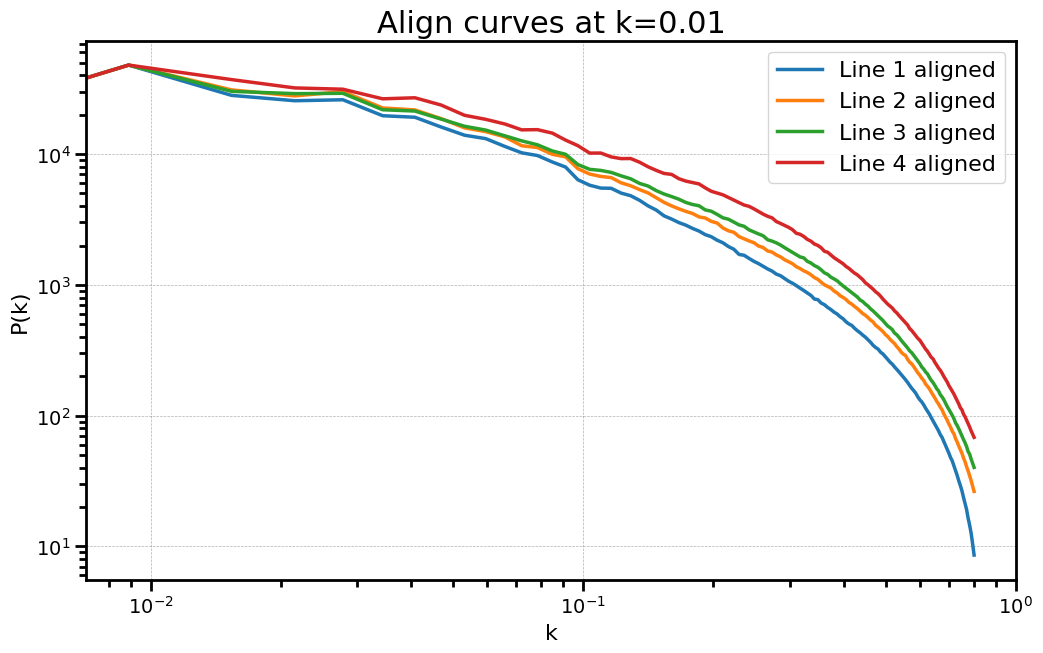

In [9]:
import numpy as np

for num in ['12_bin', '12_5_bin', '13_bin', '13_5_bin']:
    # plt.figure()
    #无weight部分
    #读数据
    cat_nw = m.data_read(num)
    #加红移
    cat_nw = m.RED(cat_nw)
    #计算矩阵
    r01_nw, P01_nw = m.momentum_00(cat_nw, num)

    r01_nw_nc , P01_nw_nc = m.momentum_00_nocompensate(cat_nw, num)
    if num == '12_bin' : 
        k1 = r01_nw.power['k']
        P1 = P01_nw
        k1_nc == r01_nw_nc
        P1_nc = P01_nw_nc
    elif num == '12_5_bin' : 
        k2 = r01_nw.power['k']
        P2 = P01_nw
        k2_nc == r01_nw_nc
        P2_nc = P01_nw_nc
    elif num == '13_bin' :
        k3 = r01_nw.power['k']
        P3 = P01_nw   
        k3_nc == r01_nw_nc
        P3_nc = P01_nw_nc
    elif num == '13_5_bin' :
        k4 = r01_nw.power['k']
        P4 = P01_nw  
        k4_nc == r01_nw_nc
        P4_nc = P01_nw_nc      


lines = [
    ('12_bin',     k1,     P1),
    ('12_5_bin',   k2,     P2),
    ('13_bin',     k3,     P3),
    ('13_5_bin',   k4,     P4),
    ('12_bin_nc',  k1_nc,  P1_nc),
    ('12_5_bin_nc',k2_nc,  P2_nc),
    ('13_bin_nc',  k3_nc,  P3_nc),
    ('13_5_bin_nc',k4_nc,  P4_nc),
]


target_k = 0.01

k_ref, P_ref = lines[0]

idx_ref = np.argmin(np.abs(k_ref - target_k))

P_ref_value = P_ref[idx_ref]

plt.figure()

# for i, (k_i, P_i) in enumerate(lines):
#     idx_i = np.argmin(np.abs(k_i - target_k))
#     P_i_value = P_i[idx_i]
#     factor = P_ref_value / P_i_value
#     P_i_aligned = P_i * factor
#     plt.loglog(k_i, P_i_aligned, label=f'Line {i+1} aligned')



plt.figure()
for name, k_i, P_i in lines:
    idx_i = np.argmin(np.abs(k_i - target_k))
    factor = P_ref_value / P_i[idx_i]
    P_i_aligned = P_i * factor
    ls = '--' if 'nc' in name else '-'
    plt.loglog(k_i, P_i_aligned, linestyle=ls, label=name)

plt.xlabel('k')
plt.ylabel('P(k)')
plt.title('Align curves at k=0.01')
plt.legend()
plt.show()

plt.xlabel('k')
plt.ylabel('P(k)')
plt.title('Align curves at k=0.01')
plt.legend()
plt.show()


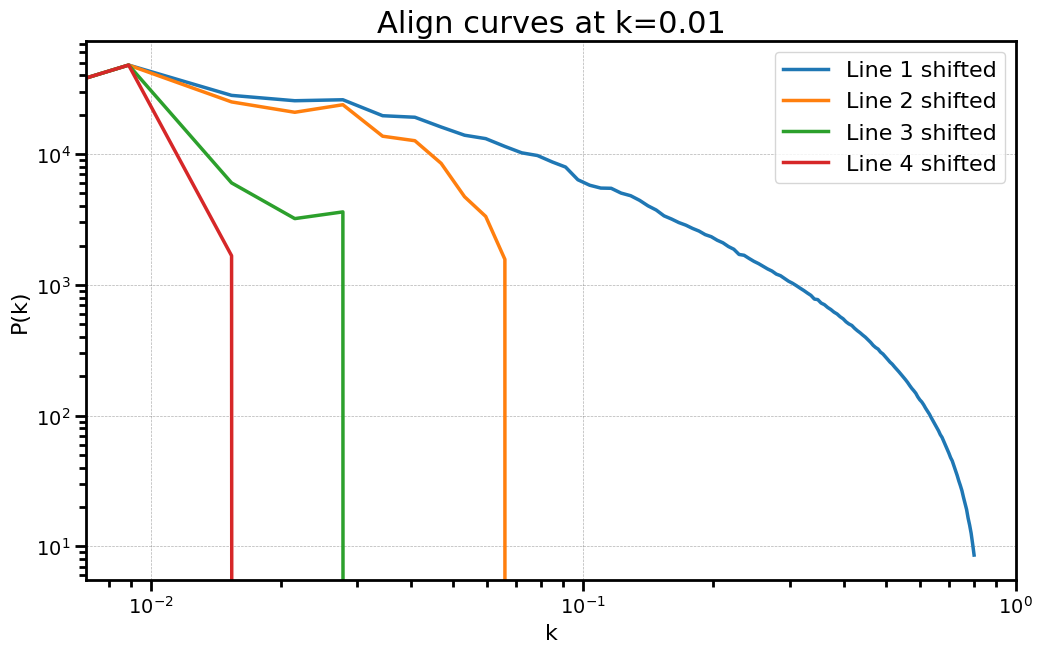

In [ ]:
import numpy as np

for num in ['12_bin', '12_5_bin', '13_bin', '13_5_bin']:
    # plt.figure()
    #无weight部分
    #读数据
    cat_nw = m.data_read(num)
    #加红移
    cat_nw = m.RED(cat_nw)
    #计算矩阵
    r01_nw, P01_nw = m.momentum_00(cat_nw, num)
    if num == '12_bin' : 
        k1 = r01_nw.power['k']
        P1 = P01_nw
    elif num == '12_5_bin' : 
        k2 = r01_nw.power['k']
        P2 = P01_nw
    elif num == '13_bin' :
        k3 = r01_nw.power['k']
        P3 = P01_nw   
    elif num == '13_5_bin' :
        k4 = r01_nw.power['k']
        P4 = P01_nw        


lines = [
    (k1, P1),
    (k2, P2),
    (k3, P3),
    (k4, P4),
]


target_k = 0.01

k_ref, P_ref = lines[0]
idx_ref = np.argmin(np.abs(k_ref - target_k))
target_value = P_ref[idx_ref]

plt.figure()

for i, (k, P) in enumerate(lines):
    idx = np.argmin(np.abs(k - target_k))
    offset = target_value - P[idx]  
    P_aligned = P + offset       
    plt.loglog(k, P_aligned, label=f'Line {i+1} shifted')

plt.xlabel('k')
plt.ylabel('P(k)')
plt.title('Align curves at k=0.01')
plt.legend()


# output_path = os.path.join(out_dir, 'all_aligned.png')
# plt.savefig(output_path,
#             dpi=300,             
#             bbox_inches='tight'  
#            )

plt.show()